# Progetto Finale Data Science
In questo progetto ho un dataset contenente diversi fattori che influenzano la soddisfazione dei passeggeri delle compagnie aeree.

Obiettivo: creare un modello che preveda se un cliente era Soddisfatto o Insoddisfatto dell'esperienza e/o del servizio fornito da una compagnia aerea.

## Indice

1. [Importazione e analisi introduttiva dei dati](#1.-Importazione-e-analisi-introduttiva-dei-dati)


2. [Analisi esplorativa dei dati](#2.-Analisi-esplorativa-dei-dati)<br>
   2.1 [Correlazione tra features](#2.1-Correlazione-tra-features)<br>
   2.2 [Outliers](#2.2-Outliers):<br>
   2.3 [Selezione delle features più influenti](#2.3-Selezione-delle-features-più-influenti)<br>
   2.3.1 [Test Chi-square](#2.3.1-Test-Chi-square)<br>
   2.3.2 [Test Anova](#2.3.2-Test-Anova)<br>


3. [Scelta del modello predittivo](#3.-Scelta-del-modello-predittivo)<br>
   3.1 [Prepocessing](#3.1-Prepocessing)<br>
   3.2 [Spot check su tutte le features](#3.2-Spot-check-su-tutte-le-features)<br>
   3.3 [Spot check su features selezionate](#3.3-Spot-check-su-features-selezionate)<br>
   3.4 [Selezione iperparametri dei migliori modelli](#3.4-Selezione-iperparametri-dei-migliori-modelli)<br>
   3.5 [Valutazione modelli sul test set](#3.5-Valutazione-modelli-sul-test-set)<br>
   

## 1. Importazione e analisi introduttiva dei dati

In [1]:
#importo i pacchetti
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

os.chdir(r"C:\Users\Win10")

#preferisco vedere tutte le colonne
pd.set_option("max_columns", None)

In [2]:
#importo il dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#vedo le prime 3 righe del dataset per vedere come è composto
df_train.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


In [4]:
#faccio lo stesso con il dataset di test
df_test.head(3)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied


In [5]:
#voglio avere maggiori informazione sul dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Come possiamo vedere il dataset è formato da 103904 righe e 25 colonne. Ci sono valori mancanti in 'Arrival Delay in Minutes'.

In [6]:
#calcoliamo il numero di dati mancanti per il training set
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
#ci sono solo 310 dati mancanti su 103904 quindi opto per eliminarli dal dataset
df_train = df_train.dropna()

In [8]:
#controllo anche il dataset di test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Il dataset di test è formato da 25976 righe e 25 colonne. Anche qui ci sono dei dati mancanti in 'Arrival Delay in Minutes'.

In [9]:
#calcoliamo il numero di dati mancanti per il test set
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
#anche qui elimino i dati mancanti dato che sono 83 su 25976
df_test = df_test.dropna()

In [11]:
#elimino la colonna Unnamed: 0 e id che sicuro non sono utili per la nostra previsione
df_train = df_train.drop(['Unnamed: 0', 'id'], axis=1)
df_test = df_test.drop(['Unnamed: 0', 'id'], axis=1)

Descrizione delle Features:

1. **Sesso**: uomo o donna
2. **Tipo di cliente**: cliente fidelizzato o non fidelizzato
3. **Età**: l'età effettiva del passeggero
4. **Tipo di viaggio**: lo scopo del volo del passeggero (viaggio personale o di lavoro)
5. **Classe**: business, economy, economy plus
6. **Distanza del volo**
7. **Servizio Wi-Fi in volo**: livello di soddisfazione per il servizio Wi-Fi a bordo (0-5)
8. **Orario di partenza/arrivo**: livello di soddisfazione dell'orario di partenza/arrivo (0-5)
9. **Facilità di prenotazione online**: tasso di soddisfazione della prenotazione online (0-5)
10. **Posizione del gate**: livello di soddisfazione per la posizione del gate (0-5)
11. **Cibo e bevande**: livello di soddisfazione di cibi e bevande (0-5)
12. **Imbarco online**: livello di soddisfazione per l'imbarco online (0-5)
13. **Comfort del posto a sedere**: livello di soddisfazione del posto a sedere (0-5)
14. **Intrattenimento in volo**: soddisfazione per l'intrattenimento in volo (0: non valutato; 1-5)
15. **Servizio di bordo**: livello di soddisfazione per il servizio di bordo (0-5)
16. **Servizio in camera per le gambe**: livello di soddisfazione per il servizio in camera per le gambe (0: non valutato; 1-5)
17. **Gestione bagagli**: livello di soddisfazione per la gestione dei bagagli (0-5)
18. **Servizio di check-in**: livello di soddisfazione per il servizio di check-in (0-5)
19. **Servizio in volo**: livello di soddisfazione per il servizio in volo (0-5)
20. **Pulizia**: livello di soddisfazione per la pulizia (0-5)
21. **Ritardo della partenza in minuti**
22. **Ritardo dell' arrivo in minuti**

**Label** ->
**Soddisfazione**: Soddisfatto o Neutrale/insoddisfatto

# 2. Analisi esplorativa dei dati

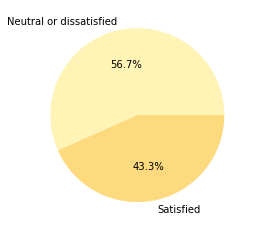

In [12]:
#controlliamo se il nostro dataset è bilanciato
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

56.7% per neutrale/insoddisfatto e 43.3% per soddisfatto. È abbastanza bilanciato!

In [13]:
#creo delle liste per ogni tipo di feature per studiarne le correlazioni.

#features numeriche discrete:
num = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

#features categoriche ordinali:
cat_ord=[]
for i in df_train.columns:
    if i not in num and df_train[i].dtype == "int64":
        cat_ord.append(i)

#features categoriche (qualitative) binarie:
binary = []
for i in df_train.columns:
    if len(df_train[i].unique()) == 2:
        binary.append(i) 

#features categoriche qualitative:
cat_qual = []
for i in df_train.columns:
    if i not in binary and df_train[i].dtype == "object":
        cat_qual.append(i)
        
print(f"Features numeriche:\n{num} \nTot: {len(num)}" )
print(f"Features categoriche ordinali:\n{cat_ord}\nTot: {len(cat_ord)}")
print(f"Features categoriche binarie:\n{binary}\nTot:{len(binary)}")
print(f"Features categoriche qualitative:\n{cat_qual}\nTot: {len(cat_qual)}")

Features numeriche:
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 
Tot: 4
Features categoriche ordinali:
['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
Tot: 14
Features categoriche binarie:
['Gender', 'Customer Type', 'Type of Travel', 'satisfaction']
Tot:4
Features categoriche qualitative:
['Class']
Tot: 1


## 2.1 Correlazione tra features

<AxesSubplot:xlabel='Type of Travel', ylabel='Count'>

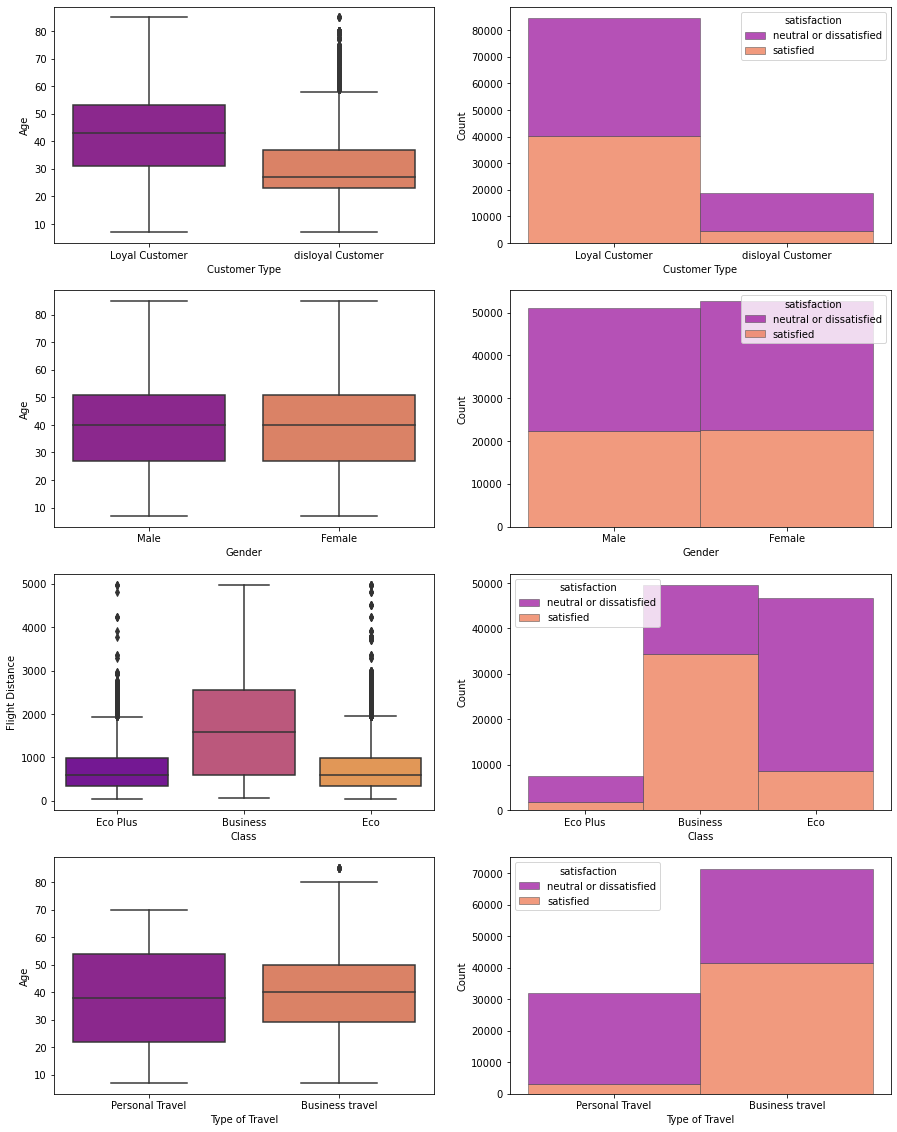

In [14]:
#creo dei boxplot e degli istogrammi per vedere le correlazioni delle variabili qualitative
f, ax = plt.subplots(4, 2, figsize = (15,20))
sns.boxplot(x = "Customer Type", y = "Age", palette = "plasma", data = df_train, ax = ax[0, 0])
sns.histplot(df_train, x = "Customer Type", hue = "satisfaction", multiple = "stack", palette = "plasma", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])

sns.boxplot(x = "Gender", y = "Age", palette = "plasma", data = df_train, ax = ax[1, 0])
sns.histplot(df_train, x = "Gender", hue = "satisfaction", multiple = "stack", palette = "plasma", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

sns.boxplot(x = "Class", y = "Flight Distance", palette = "plasma", data = df_train, ax = ax[2, 0])
sns.histplot(df_train, x = "Class", hue = "satisfaction", multiple = "stack", palette = "plasma", edgecolor = ".3", linewidth = .5, ax = ax[2, 1])

sns.boxplot(x = "Type of Travel", y = "Age", palette = "plasma", data = df_train, ax = ax[3, 0])
sns.histplot(df_train, x = "Type of Travel", hue = "satisfaction", multiple = "stack", palette = "plasma", edgecolor = ".3", linewidth = .5, ax = ax[3, 1])


Dai boxplot possiamo notare come l'età media del cliente fidelizzato è abbastanza più alto di quello non fidelizzato (42 vs 28), mentre l'età media dei generi e del tipo di viaggio è la stessa. Quindi possiamo pensare che il cliente resti fedele con il passare degli anni.

I clienti inoltre preferisco prende una Business Class per i voli di lunga distanza.

I clienti sono per lo più neutrali o non soddisfatti se non sono fidelizzati, se viaggiano in una Eco Class e se fanno viaggi personali; mentre sono soddisfatti se viaggiano in una Business Class e se fanno viaggi di lavoro (le 2 variabili potrebbe essere anche correlate fra di loro dato che di solito chi fa dei Business travel viaggia in una Business Class).

Si potrebbe ipotizzare che le variabili Class e Type of Travel potrebbero influenzare maggiormente la soddisfazione del cliente.

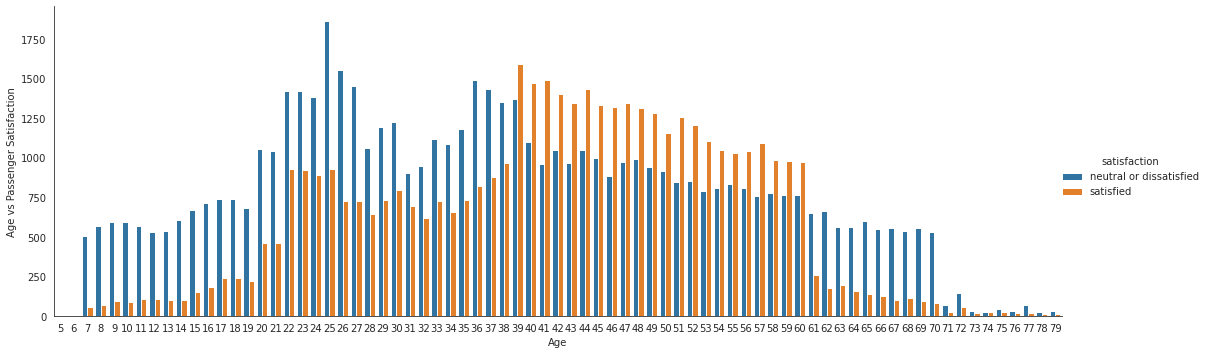

In [15]:
#relazione tra età e soddisfazione del passeggero
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df_train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

L'età dei clienti maggiormente soddisfatti va dai 39 ai 60; mentre i passeggeri con età compresa tra i 22 e i 38 sono maggiormente neutrali o insoddisfatti.

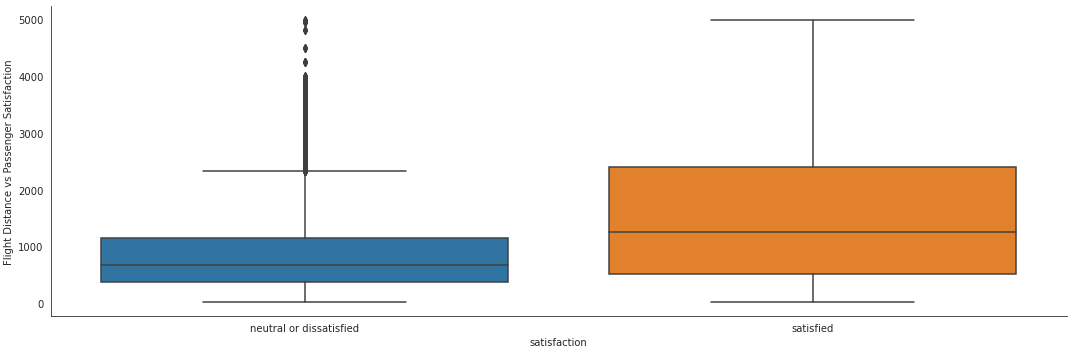

In [16]:
#relazione tra età e soddisfazione del passeggero
with sns.axes_style('white'):
    g = sns.catplot(x='satisfaction', y='Flight Distance', data=df_train, aspect=3.0, kind='box')
    g.set_ylabels('Flight Distance vs Passenger Satisfaction')

I passeggeri soddisfatti fanno viaggi più lunghi rispetto a quelli neutrali/non soddisfatti (la mediana della distanza del volo dei passeggeri soddisfattti è il doppio).

Quindi 'Flight Distance' sembra influenzare la soddisfazione del cliente.

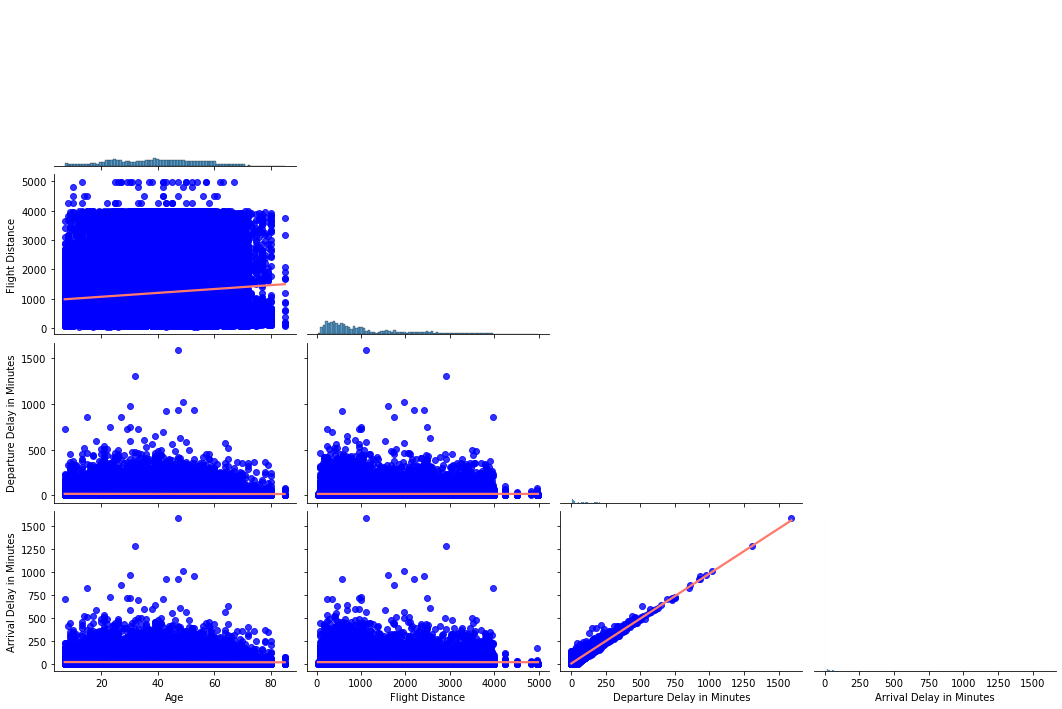

In [17]:
#relazione tra le variabili numeriche attraverso un grafico a dispersione
sns.pairplot(df_train[num],
             kind='reg',
             height=2.5, aspect=1.5, corner=True,
             plot_kws={'ci':None, 'color':'xkcd:salmon',
                      'scatter_kws':{'color':'blue'}
                      }
            )

Come era prevedibile 'Departure Delay in Minutes' e 'Arrival Delay in Minutes' sono fortemente correlate.
Successivamente vediamo il loro livello di correlazione attraverso una matrice di correlazione.

<AxesSubplot:>

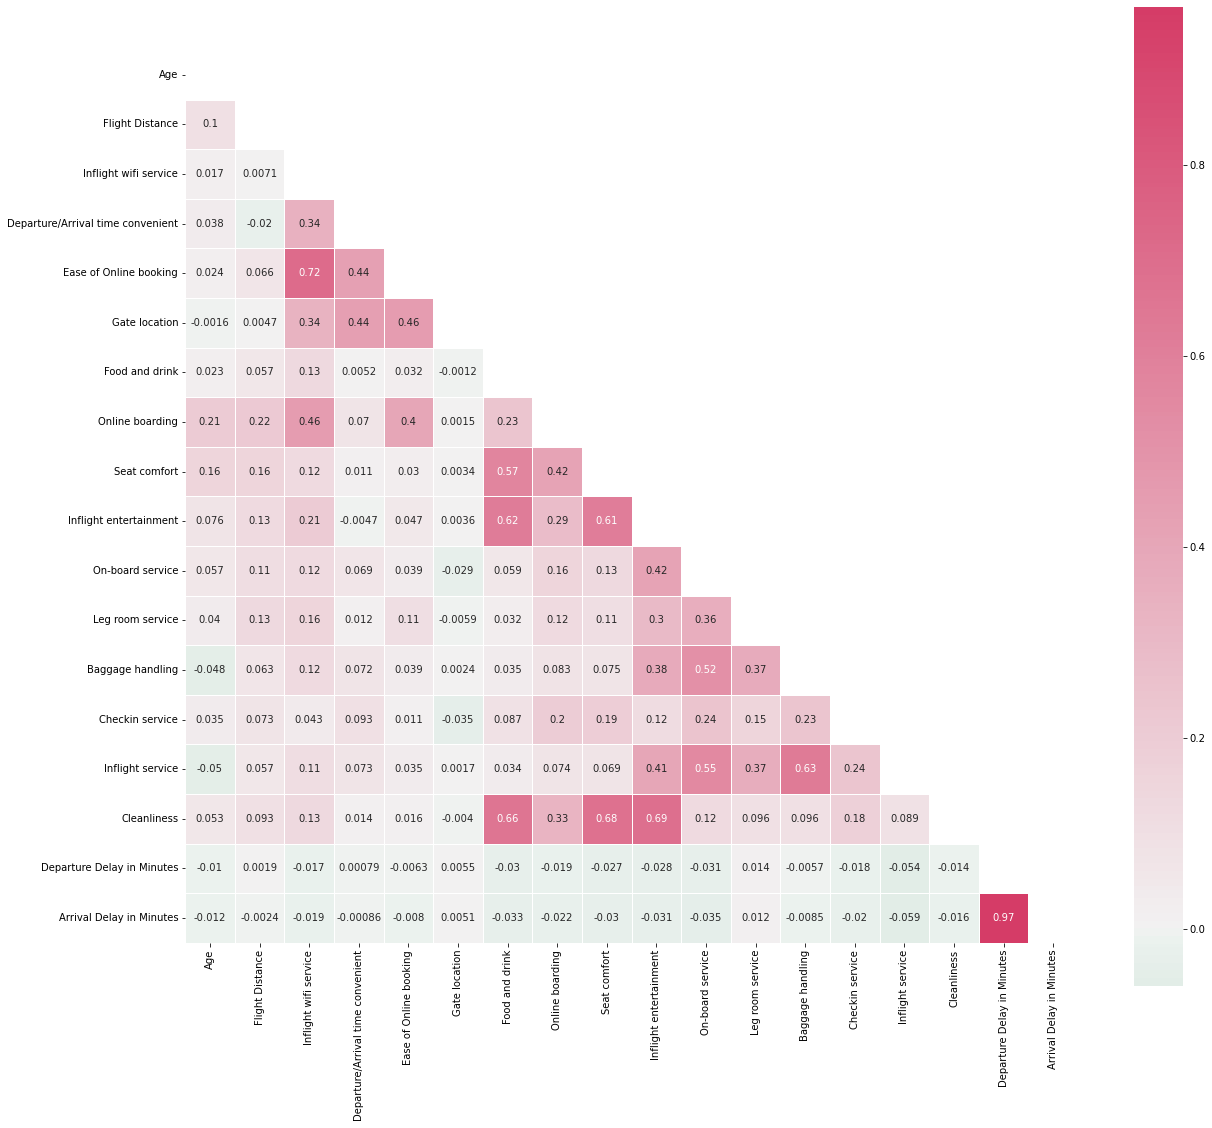

In [18]:
#eseguiamo una matrice di correlazione per vedere se ci sono casi di multicollinearità
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

'Arrival Delay in Minutes' e 'Departure Delay in Minutes' sono molto correlati (0.97), potrei quindi decidere di eliminare una delle due variabili. (Questa operazione la faccio successivamente attraverso il Test Anova).

In [19]:
#ho variabili categoriche che voglio codificare
#ho prima bisogno dei nomi delle variabili
{column: list(df_train[column].unique()) for column in df_train.select_dtypes('object').columns}

{'Gender': ['Male', 'Female'],
 'Customer Type': ['Loyal Customer', 'disloyal Customer'],
 'Type of Travel': ['Personal Travel', 'Business travel'],
 'Class': ['Eco Plus', 'Business', 'Eco'],
 'satisfaction': ['neutral or dissatisfied', 'satisfied']}

In [20]:
def drops (data):
    #codifico le variabili nominali
    data['Gender'] = data['Gender'].map({'Male' : 1, 'Female' : 0})
    data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})
    data['Class'] = data['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco': 0})
    data['Type of Travel'] = data['Type of Travel'].map({'Personal Travel' : 1, 'Business travel' : 0})
    #data['satisfaction'] = data['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})
    
    return data

In [21]:
#il training set con variabili codificate lo chiamo data_train
data_train = drops(df_train)

In [22]:
#il test set con variabili codificate lo chiamo data_test
data_test = drops(df_test)

In [23]:
data_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,1,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,0,25,0,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,1,26,0,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied


Creo ora una funzione per cui per il valore di ogni features viene calcolata la ripartizione percentuale di neutrali/insoddisfatti e soddisfatti e, dopodichè, disegna un grafico a barre e linee per la rappresentazione.

In [24]:
from matplotlib.ticker import MaxNLocator
def percentage_chart(df_train, feature, palette="plasma", kind="bar"):
    xx = pd.crosstab(df_train[feature], df_train["satisfaction"]).reset_index() #creazione tabella pivot 
    xx = xx.set_index(feature)
    xx = xx.apply(lambda x:x/x.sum()*100, axis=1).reset_index()
    xx = pd.melt(xx, id_vars=feature, var_name="satisfaction")
    
    if kind=="bar":
        sns.barplot(data=xx, x=feature, y="value", hue="satisfaction", palette=palette).set(
                ylabel="percenage of the total%")
        
    elif kind=="line":
        sns.lineplot(data=xx, x=feature, y="value", hue="satisfaction", palette=palette).set(
                ylabel="percenage of the total%")
        plt.locator_params(axis="x", nbins=5)
        
    else:
        raise ValueError

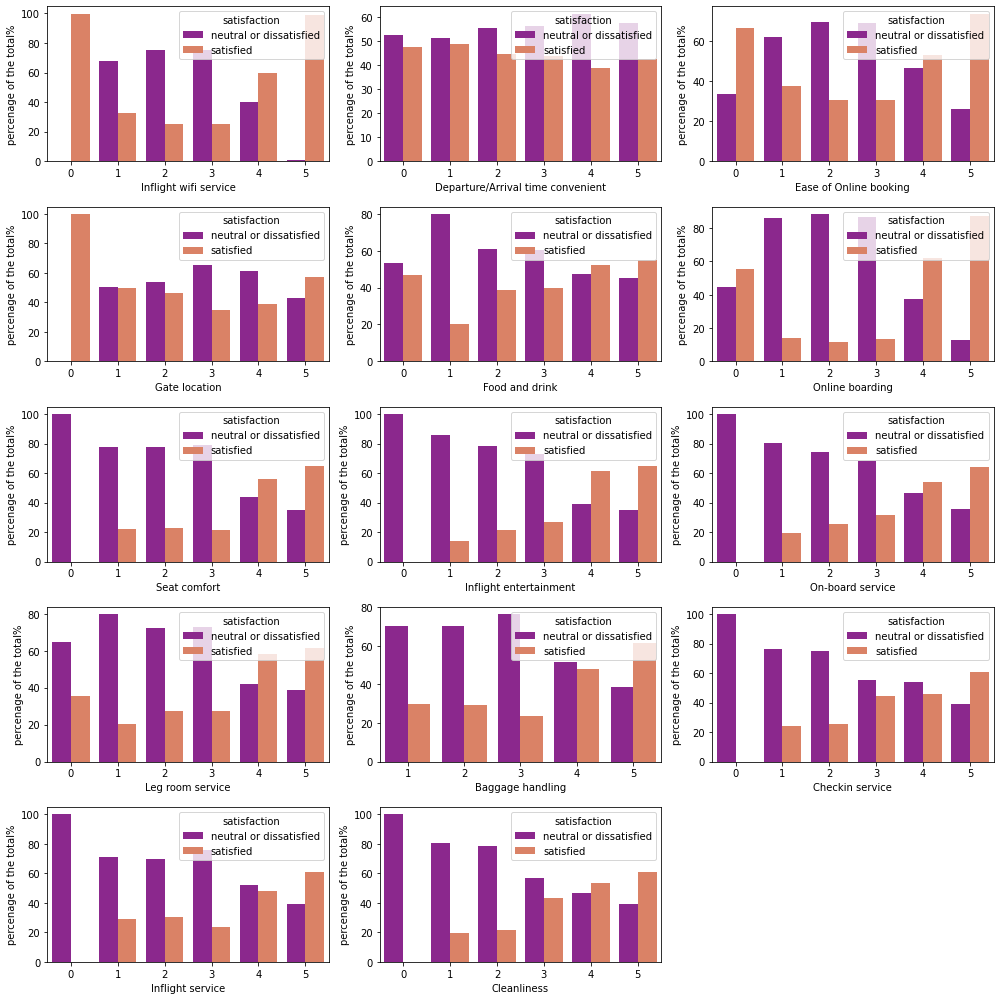

In [25]:
#grafico a barre della funzione precedente
i=1
plt.figure(figsize=(14,14))
for col in cat_ord:
    plt.subplot(5, 3, i)
    percentage_chart(df_train, col, palette="plasma")
    plt.tight_layout()
    i+=1

Si può vedere come nella maggior parte dei casi all'aumentare del voto aumenta la soddisfazione e si riduce l'insoddisfazione. Si può vedere in quasi tutte le varibili tranne che 'Departure/Arrival time convenient' e 'Gate location'.

Al livello 0 vediamo che spesso la soddisfazione è alta, esso potrebbe essere o un valore anomalo o magari un valore nullo.

Ora vediamo meglio l'andamento con un grafico a linee

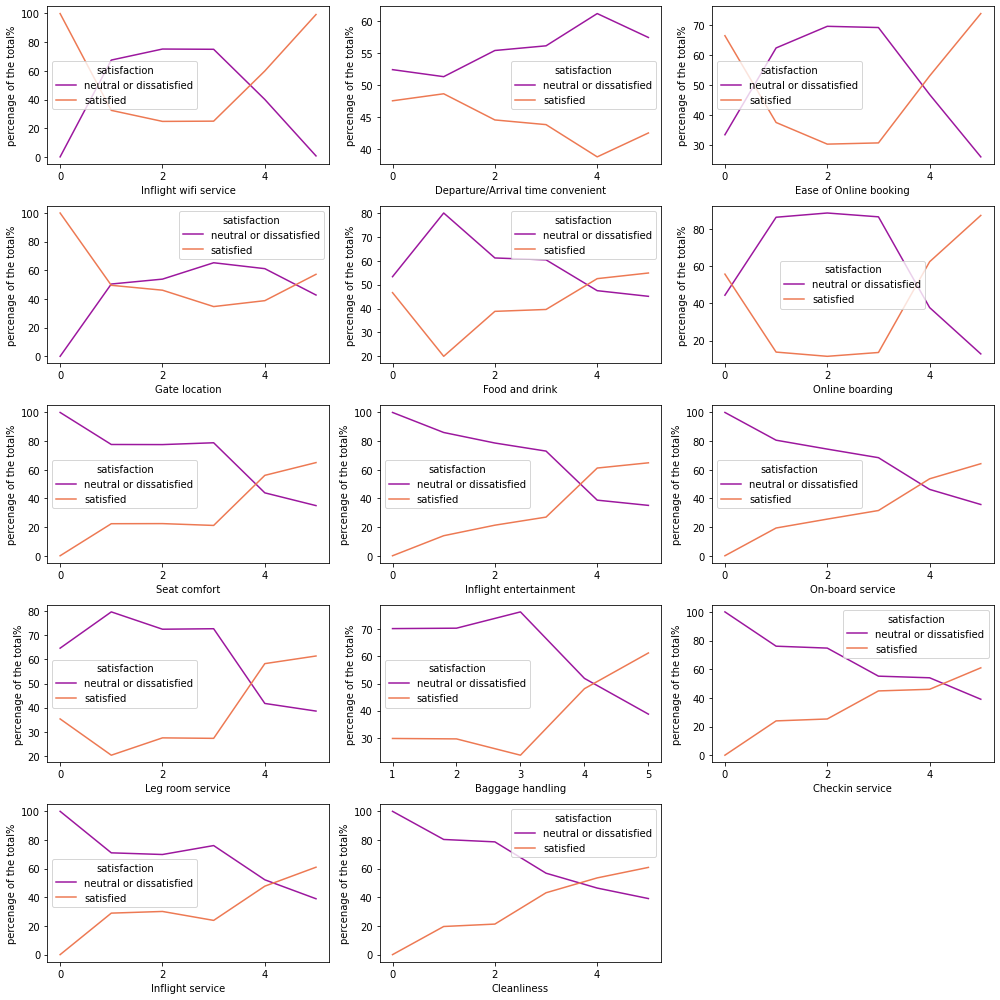

In [26]:
#grafico a linee
i=1
plt.figure(figsize=(14,14))
for col in cat_ord:
    plt.subplot(5, 3, i)
    percentage_chart(df_train, col, palette="plasma", kind="line")
    plt.tight_layout()
    i+=1
        
plt.show()

Qui si vede meglio l'andamento del livello di soddisfazione.

Le variabili che meglio sembrerebbero spiegare il livello di soddisfazione sono 'Seat confort', 'Inflight entertainment', 'On-boarding service'.

'Online boarding'(peccato per il valore 0 che distorce l'andamento) ha valori molto bassi di soddisfazione(<20%) quando i valori sono tra 1 e 3 e valori molto alti di soddisfazione(>80%) quando i valori sono 4 e 5.

## 2.2 Outliers

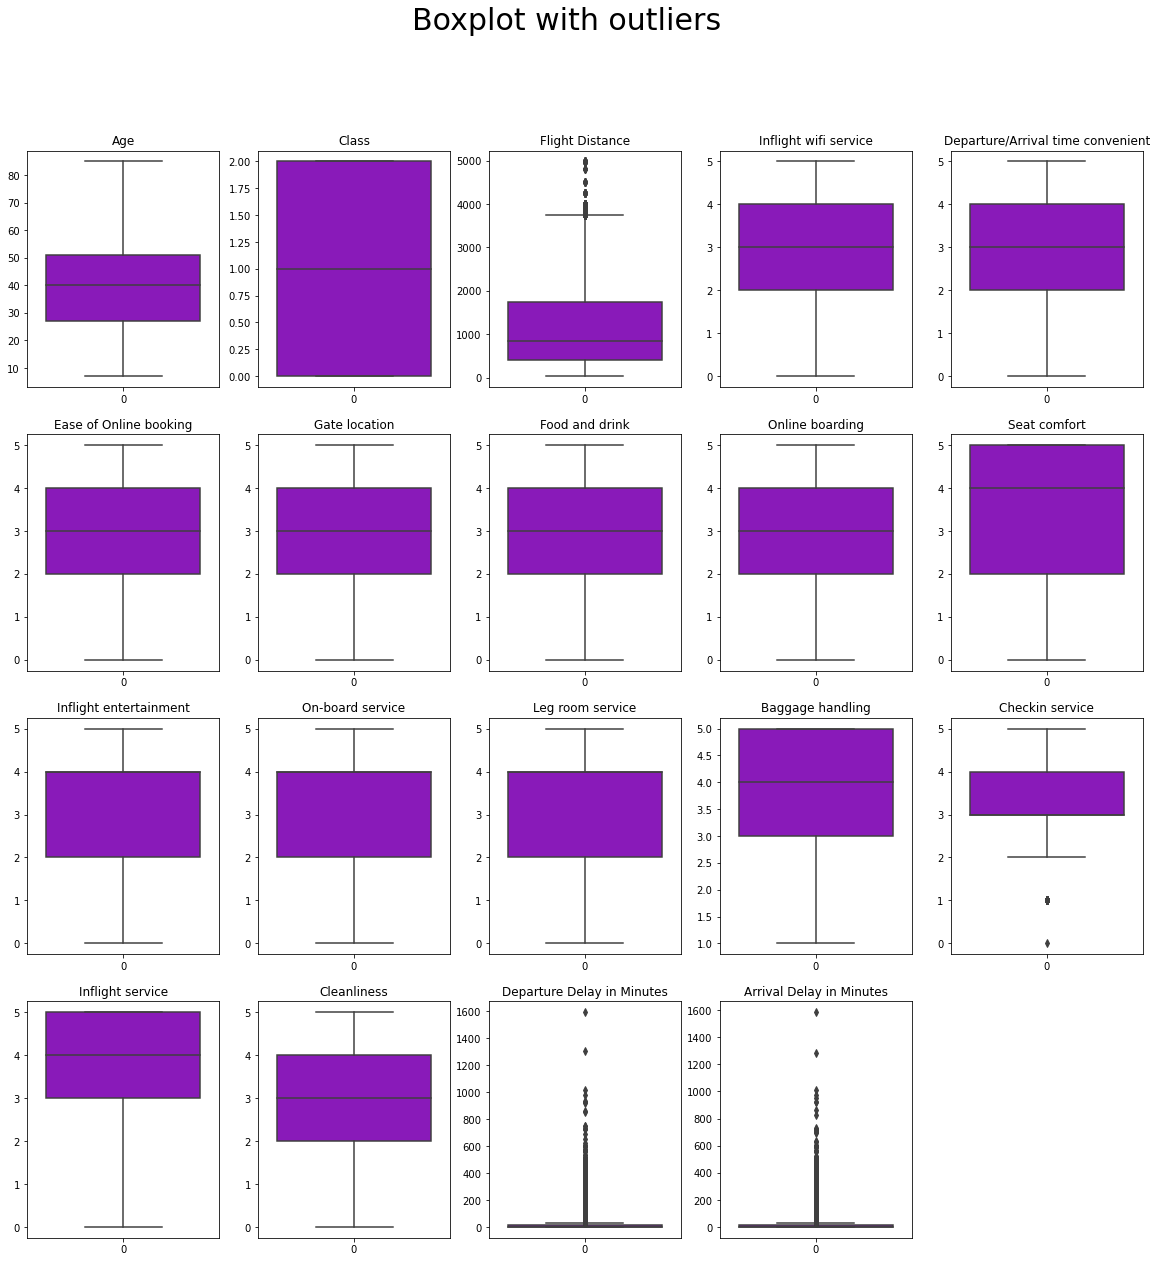

In [27]:
#per i valori outliers useremo un boxplot utilizzando solo le colonne non binarie.
nonbinary_columns =[column for column in df_train.columns if len(df_train[column].unique())>2]

plt.figure(figsize = (20,20))
for i, column in enumerate (nonbinary_columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df_train[column], color = 'darkviolet')
    plt.title (column)
plt.suptitle ('Boxplot with outliers', size=30)
plt.show()

Sono presenti valori outliers in 'Flight Distance', 'Checkin service' e molti valori outliers in 'Departure Delay in Minutes' e 'Arrival Delay in Minutes'.

Vediamo di quanto si riduce il mio dataset se elimino i valori outliers

In [28]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

In [29]:
train_no_outliers = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_no_outliers.shape

(61034, 23)

Elimina circa 40.000 righe. Il 40% dei dati sono outliers, decido quindi di non eliminarli per non ridurre molto il mio training set.

## 2.3 Selezione delle features più influenti

### 2.3.1 Test Chi-square

Codifico anche la mia label in 0 e 1 e successivamente eseguo un test Chi-square (solo sulle variabili categoriche) per vedere quali variabili incide maggiormente sulla soddisfazione del passeggero.

In [31]:
data_satisf = data_train['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})

                               Score  P_Values
Class                   22841.336269       0.0
Online boarding         14709.256963       0.0
Type of Travel          14407.088531       0.0
Inflight entertainment   8691.512615       0.0


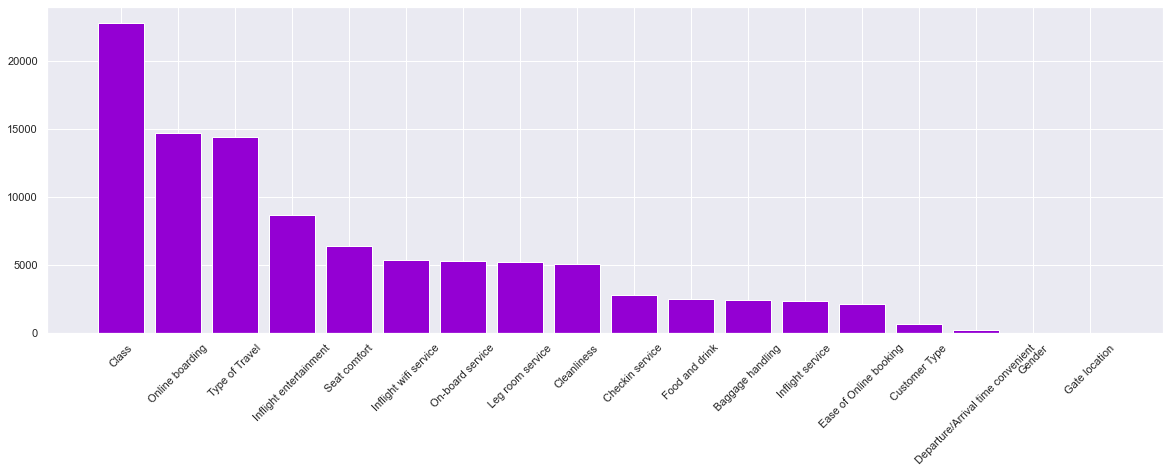

In [33]:
from sklearn.feature_selection import SelectKBest, chi2
X = data_train.drop(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], axis=1) #elimino le variabili numeriche
y = data_satisf
cs = SelectKBest(chi2, k=4)
cs.fit(X, y)
feature_score = pd.DataFrame({'Score':cs.scores_, 'P_Values':cs.pvalues_}, index=X.columns)
print(feature_score.nlargest(n=4, columns='Score'))


# df con i punteggi del test
X_score = pd.DataFrame(cs.scores_, index=X.columns, columns=["X_score"])
X_score = X_score.sort_values(by="X_score", ascending=False)

# grafico che mostra le feature più influenti
sns.set()
plt.figure(figsize=(20, 6))
plt.bar(x=X_score.index, height=X_score["X_score"], color='darkviolet')
plt.xticks(rotation=45)
plt.show()

per il test Chi-square le 4 feature più importanti sono 'Class', 'Online boarding' e 'Type of Travel' e 'Inflight entertainment'.

### 2.3.2 Test Anova

Per il test Anova invece utilizzo esclusivamente le variabili numeriche

                                   Score      P_Values
Flight Distance             10164.144626  0.000000e+00
Age                          1982.685800  0.000000e+00
Arrival Delay in Minutes      344.619158  8.391470e-77
Departure Delay in Minutes    265.019573  1.638513e-59


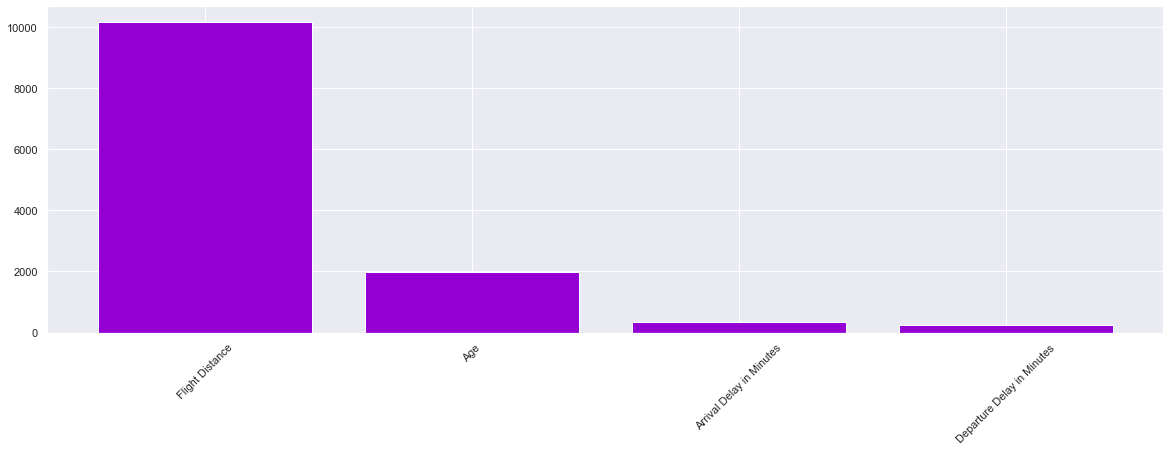

In [34]:
from sklearn.feature_selection import f_classif
X = data_train[num] #variabili numeriche
y = data_satisf
fs = SelectKBest(score_func=f_classif, k=4) 
fs.fit(X, y)
feature_score = pd.DataFrame({'Score':fs.scores_, 'P_Values':fs.pvalues_}, index=X.columns)
print(feature_score.nlargest(n=4, columns='Score'))

# creo un df con i punteggi del test
anova_score = pd.DataFrame(fs.scores_, index=X.columns, columns=["Anova_Score"])
anova_score = anova_score.sort_values(by="Anova_Score", ascending=False)

# visulaizzo con un grafico a barre quali sono le feature più influenti
sns.set()
plt.figure(figsize=(20, 6))
plt.bar(x=anova_score.index, height=anova_score["Anova_Score"], color='darkviolet')
plt.xticks(rotation=45)
plt.show()

Per il test Anova tutte e 4 feature numeriche sono rilevanti in quanto hanno un p-value molot piccolo.

Decido di scegliere tra le 4 variabili più influenti sulla soddisfazione dei passeggeri 'Class', 'Online boarding', 'Type of Travel' e 'Flight Distance'. che hanno un p-value bassissimo e uno score più alto.

In [35]:
#annoto in una lista le 4 features più importanti:
top4_feature = ['Class', 'Online boarding', 'Type of Travel', 'Flight Distance'] 

# 3. Scelta del modello predittivo

## 3.1 Prepocessing

In [36]:
#carico tutti i moduli di sklearn che mi serviranno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

#algoritmi che ho intenzione di utilizzare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean

In [37]:
#impostiamo la nostra k-fold cross validation utile per la validazione del modello
seed=1
cv = KFold(n_splits=10, random_state=seed, shuffle=True)

#divido la label dalle features per il training set
X = data_train.iloc[:,:-1]
y = data_train.loc[:, "satisfaction"]

#Standardizzo le feature
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

#faccio lo stesso con il test set
X_test = data_test.iloc[:,:-1]
y_test = data_test.loc[:, "satisfaction"]

scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X_test.columns)

Abbiamo un problema di Classificazione ed utilizzerò 4 modelli: Logistic Regression, Random Forest Classifier, AdaBoost Classifier e Gradient Boosting Classifier.

Inizialmente effettuerò uno spot chek sui modelli selezionati prima utilizzando tutte le features poi usero solo le 4 features che si sono mostrate più rilevanti nei test precedentemente effettuati.

Sceglierò i 2 modelli migliori usando come metodo di evaluation la k-fold

Effettuerò sui 2 modelli migliori un tuning degli iperparametri attraverso la RandomizedSearchCV. 

Valuterò infine i 2 modelli sul test set.

Come metrica per misuare la performance del modello userò l'accuracy.
L'**accuracy** è il numero totale di dati etichettati correttamente rispetto al totale. L'accuracy è una buona metrica se la label è distribuite uniformemente, ovvero è un set di dati bilanciato. (come nel nostro caso).

Nel caso in cui il mio set di dati non fosse bilanciato avrei optato come metrica F1_score (combina le metriche di precision e recall), oppure la curva ROC che è una curva di probabilità che traccia il TPR (Tasso di vero positivo) rispetto al FPR (Tasso di falso positivo) a vari valori di soglia. 

## 3.2 Spot check su tutte le features

In [38]:
#Logistic Regression
tab = [] #crea una tabella dove andrò ad inserire i risultati degli algoritmi

lr = LogisticRegression(random_state=seed)
lr.fit(X, y)

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=cv, n_jobs=-1) #n_jobs è il numero di lavori eseguiti in parallelo (-1 significa tutti)

tab.append(['lr', mean(scores)]) #inserisco i risultati nella tabella

In [39]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state=seed)
rfc.fit(X, y)

scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['rfc', mean(scores)])

In [40]:
#AdaBoost Classifier
abc = AdaBoostClassifier(random_state=seed)
abc.fit(X, y)

scores = cross_val_score(abc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['abc', mean(scores)])

In [41]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=seed)
gbc.fit(X, y)

scores = cross_val_score(gbc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['gbc', mean(scores)])

## 3.3 Spot check su features selezionate

In [42]:
X_top = X.loc[:, ['Class', 'Online boarding', 'Type of Travel', 'Flight Distance']] #seleziono le variabili che si sono dimostrate migliori

In [43]:
#eseguo di nuovo tutti gli algoritmi sono considerando le variabili selezionate
lr_top = LogisticRegression(random_state=seed)
lr_top.fit(X_top, y)

scores = cross_val_score(lr_top, X_top, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['lr_top', mean(scores)])

In [44]:
rfc_top = RandomForestClassifier(random_state=seed)
rfc_top.fit(X_top, y)

scores = cross_val_score(rfc_top, X_top, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['rfc_top', mean(scores)])

In [45]:
abc_top = AdaBoostClassifier(random_state=seed)
abc_top.fit(X_top, y)

scores = cross_val_score(abc_top, X_top, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['abc_top', mean(scores)])

In [46]:
gbc_top = GradientBoostingClassifier(random_state=seed)
gbc_top.fit(X_top, y)

scores = cross_val_score(gbc_top, X_top, y, scoring='accuracy', cv=cv, n_jobs=-1)

tab.append(['gbc_top', mean(scores)])

In [47]:
#costruisco il dataframe dei risultati specificando le colonne
table = pd.DataFrame(tab, columns=['model', "accuracy_train"])
table

,model,accuracy_train
0,lr,0.874838
1,rfc,0.962517
2,abc,0.927226
3,gbc,0.941425
4,lr_top,0.812827
5,rfc_top,0.832722
6,abc_top,0.837336
7,gbc_top,0.853611


I 2 modelli migliori secondo l'accuracy sono Random Forest e Gradient Boosting Classifier con tutte le variabili. Effettuerò un tuning degli iperparametri su di essi.

# 3.4 Selezione iperparametri dei migliori modelli

In [49]:
#seleziono gli iperparametri per random forest Classifier
model = RandomForestClassifier(random_state=seed)

n_estimators = list(range(10,210,10)) #n° alberi
criterion = ['gini', 'entropy'] #La funzione per misurare la qualità di una divisione
max_depth = ['None', 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42] #n° max di features considerate per la divisione di un nodo
min_samples_split = list(range(1,11,1)) #n° min campioni necessari per dividere nodo intero
min_samples_leaf = list(range(1,11,1)) #n° min campioni richiesti in un nodo foglia
max_features = ['sqrt', 'log2', 'None'] #n° features da considerare per la miglior suddivisione

params_grid = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

num_combinations=1
for k in params_grid.keys(): num_combinations *= len(params_grid[k]) #n°combinazioni disponibili
    
print ('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  144000


{'n_estimators': [10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 'criterion': ['gini', 'entropy'],
 'max_depth': ['None', 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42],
 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['sqrt', 'log2', 'None']}

In [50]:
model_rfc = RandomizedSearchCV(model, params_grid, 
                        scoring='accuracy', #calcolo il punteggio per ognuna delle metriche scelte in precedenza
                        refit="accuracy score", #sceglie i valori che ottengono il miglior punteggio di r2 score
                        n_iter=5, #numero di combinazioni provate
                        cv=cv, 
                        n_jobs=-1,
                        random_state=seed, verbose=1)

model_rfc.fit(X, y)
print(f"Accuracy score: {model_rfc.best_score_}, hyperparameters: {model_rfc.best_params_}")                              

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Accuracy score: 0.9632411001046968, hyperparameters: {'n_estimators': 180, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}


In [53]:
##seleziono gli iperparametri per Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=seed)

learning_rate = [0.01, 0.05, 0.1, 0.25, 0.5, 1] #tasso di apprendimento di ogni albero costruito
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] #numero alberi
max_depth = list(range(1,32,1)) #profondità massima dell'albero
min_samples_split = list(range(1,11,1)) #n° min campioni necessari per dividere nodo intero
min_samples_leaf = list(range(1,11,1)) #n° min campioni richiesti in un nodo foglia
max_features = ['None', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #n° features da considerare per la miglior suddivisione

params_grid = {
    'learning_rate':learning_rate,
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

num_combinations=1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])
    
print ('Number of combinations = ', num_combinations)
params_grid

Number of combinations =  3515400


{'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5, 1],
 'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['None',
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [54]:
model_gbc = RandomizedSearchCV(model, params_grid, 
                        scoring='accuracy', #calcolo il punteggio per ognuna delle metriche scelte in precedenza
                        refit="accuracy score", #sceglie i valori che ottengono il miglior punteggio di r2 score
                        n_iter=5, #numero di combinazioni provate
                        cv=cv, n_jobs=-1,
                        random_state=seed, verbose=1)

model_gbc.fit(X, y)
print(f"Accuracy score: {model_gbc.best_score_}, hyperparameters: {model_gbc.best_params_}")                              

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Accuracy score: 0.9620924085932774, hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 20, 'max_depth': 26, 'learning_rate': 0.01}


# 3.5 Valutazione modelli sul test set

Valuto i 2 modelli a cui abbiamo fatto il tuning degli iperparametri sia sui dati di training che su quelli di test attraverso una tabella.

In [57]:
val = []

train_pred = model_rfc.predict(X)
test_pred = model_rfc.predict(X_test)
accuracy_train = accuracy_score(y, train_pred)
accuracy_test = accuracy_score(y_test, test_pred)

val.append(['model_rfc', accuracy_train, accuracy_test])

train_pred_2 = model_gbc.predict(X)
test_pred_2 = model_gbc.predict(X_test)
accuracy_train_2 = accuracy_score(y, train_pred_2)
accuracy_test_2 = accuracy_score(y_test, test_pred_2)
    
val.append(['model_gbc', accuracy_train_2, accuracy_test_2])
    
valutazione = pd.DataFrame(val, columns=["model", "accuracy_train", "accuracy_test"])
valutazione

,model,accuracy_train,accuracy_test
0,model_rfc,0.999440,0.963774
1,model_gbc,0.985105,0.960684


La RandomForestClassifier è andata in overfitting per quanto riguarda i dati di training. Quindi ritengo che il modello migliore è Gradient Boosting Classifier a cui abbiamo fatto il tuning degli iperparametri e su di esso costruisco una matrice di confusione per vedere le previsioni correttamente etichettate.

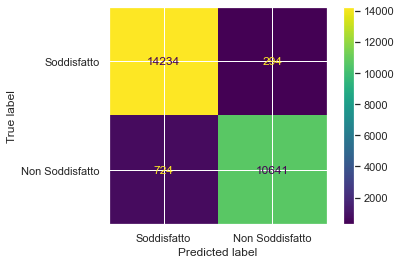

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_gbc, X_test, y_test, 
                      values_format='d', 
                      display_labels = ['Soddisfatto', 'Non Soddisfatto'])

La matrice di confusione ci mostra che 14234 su 14528 (98%) persone soddisfatte e 10641 su 11365 (93,6%) persone neutrali/insoddisfatte sono state predette correttamente?

# Conclusioni

Gradient Boosting Classifier che ho costruito attraverso il tuning degli iperparametri sembra un modello molto preciso con un'accuracy del 98% sul training set e del 96% sul test set.

Sono state utilizzate tutte le features in quanto i modelli che utilizzavano le 4 feature che avevamo selezionato si sono rivelati più inefficienti; forse perchè la soddisfazione dei passeggeri dipende fortemente da molte features del dataset.